In [1]:
# FPR Case Study
# Name: Aditi Parekatt
# Roll no: 414
# Class: BSc Data Science Sem 4

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, cross_val_score    
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
df = pd.read_csv(r'C:\Users\Bhaskaran\Downloads\Fundamentals of Pattern Recognition Case Study\train.csv')
df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
df_test = pd.read_csv(r'C:\Users\Bhaskaran\Downloads\Fundamentals of Pattern Recognition Case Study\test.csv')
df_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


# The 'target' variable in the dataset is output variable

# Understanding the data set

In [5]:
df_dtypes = pd.DataFrame({'col': list(df.columns), 'type': list(df.dtypes)})
df_dtypes

,col,type
0,Id,object
1,v2a1,float64
2,hacdor,int64
3,rooms,int64
4,hacapo,int64
...,...,...
138,SQBovercrowding,float64
139,SQBdependency,float64
140,SQBmeaned,float64
141,agesq,int64


In [6]:
df.isna().sum()[df.isna().sum()!=0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

# Check if there are any bias in your dataset

In [7]:
# Target variable income value:
# - 1 : Extreme Poverty
# - 2 : Moderate Poverty
# - 3 : Vulnerable Households
# - 4 : Non-vulnerable Households

In [8]:
df.Target.value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

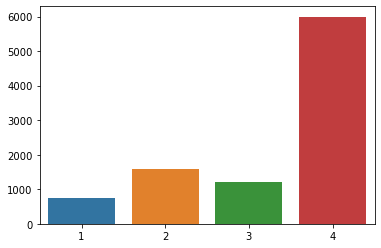

In [9]:
sns.barplot(x = df.Target.value_counts().index, y = df.Target.value_counts().values)

'extreme poverty': (1) has lowest count, and 'Non-vulnerable Households' (4) has the highest count

## The dataset is not biased.

# Visualization

Text(0.5, 1.0, 'Count of Head of House')

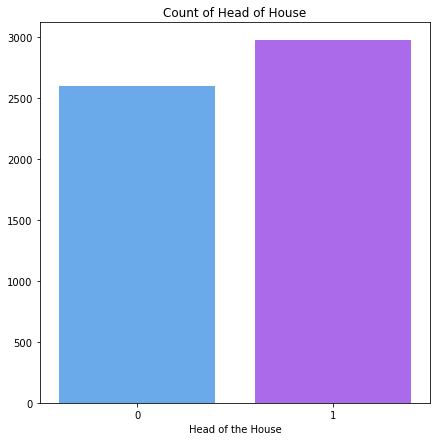

In [10]:
head_plot = df.groupby('parentesco1')['idhogar'].nunique()

#bar plot
plt.figure(figsize=(7,7))
sns.barplot(x = head_plot.index, y = head_plot.values, palette = 'cool')
plt.xlabel('Head of the House')
plt.title('Count of Head of House')

C:\Users\Bhaskaran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Male Members in a Household')

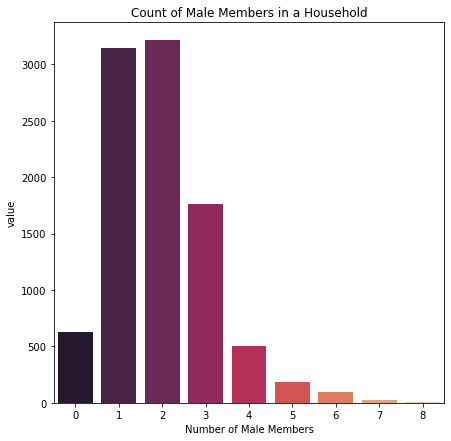

In [11]:
male_count = pd.DataFrame()
male_count['index'] = list(df.groupby('r4h3')['idhogar'].count().index)
male_count['value'] = list(df.groupby('r4h3')['idhogar'].count().values)

# bar plot
plt.figure(figsize=(7,7))
sns.barplot(male_count['index'], male_count['value'], palette = 'rocket')
plt.xlabel('Number of Male Members')
plt.title('Count of Male Members in a Household')

* by looking at the graph, we can say that max households have 2 males in their household,  followed by 1 male figure.

C:\Users\Bhaskaran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of female Members in a Household')

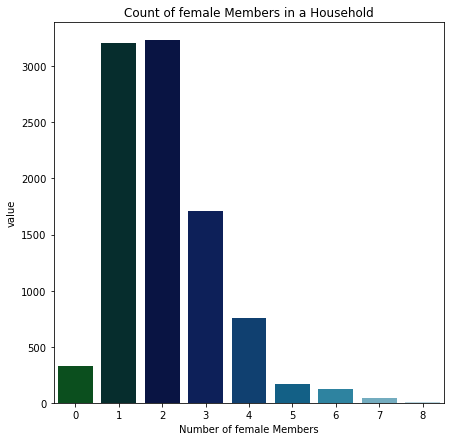

In [12]:
female_count = pd.DataFrame()
female_count['index'] = list(df.groupby('r4m3')['idhogar'].count().index)
female_count['value'] = list(df.groupby('r4m3')['idhogar'].count().values)

# bar plot
plt.figure(figsize=(7,7))
sns.barplot(female_count['index'], female_count['value'], palette = 'ocean')
plt.xlabel('Number of female Members')
plt.title('Count of female Members in a Household')

* by looking at the graph, we can say that max households have 1-2 females in their household

In [13]:
ele_list = ['public', 'planpri', 'noelec', 'coopele']
electric = pd.DataFrame({'type': ele_list})
electric['values'] = [len(df[(df[x] == 1) & (df['parentesco1'] == 1)]) for x in ele_list]

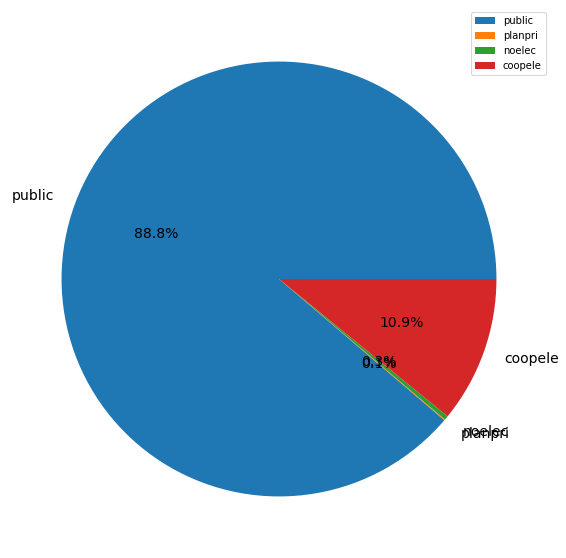

In [14]:
plt.figure(figsize=(10, 10))
plt.pie(electric['values'], labels=electric['type'], autopct='%1.1f%%', textprops={'fontsize': 14})
plt.legend()

* By observing the above figure, we can say that most of the household electricity from CNFL,  ICE,  ESPH/JASEC 

In [15]:
wall_con = ['epared1', 'epared2', 'epared3']
wall = pd.DataFrame({'type': wall_con})
wall['values'] = [len(df[(df[x] == 1) & (df['parentesco1'] == 1)]) for x in wall_con]

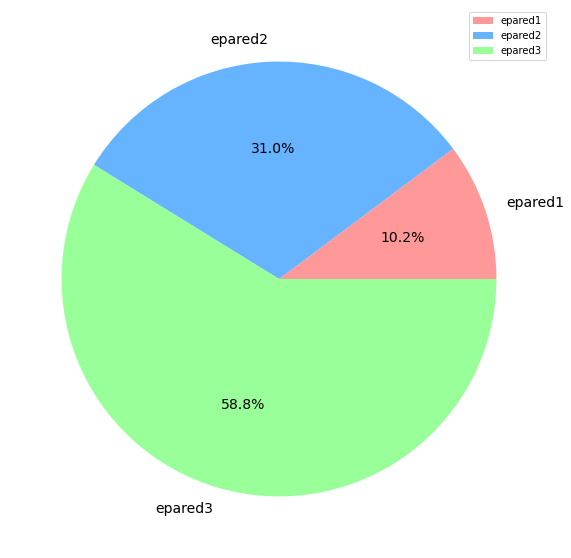

In [16]:
plt.figure(figsize=(10, 10))
colors = ['#ff9999','#66b3ff','#99ff99']
plt.pie(wall['values'], labels=wall['type'], autopct='%1.1f%%', textprops={'fontsize': 14}, colors = colors)
plt.legend()

* About 58.8% of the household have a good wall, followed by a regular wall with 31.0% and bad wall with 10.2%

In [17]:
edu_level = [x for x in df.columns if x.startswith('instlevel')]
edu_level

['instlevel1',
 'instlevel2',
 'instlevel3',
 'instlevel4',
 'instlevel5',
 'instlevel6',
 'instlevel7',
 'instlevel8',
 'instlevel9']

In [18]:
# instlevel1, =1 no level of education
# instlevel2, =1 incomplete primary
# instlevel3, =1 complete primary
# instlevel4, =1 incomplete academic secondary level
# instlevel5, =1 complete academic secondary level
# instlevel6, =1 incomplete technical secondary level
# instlevel7, =1 complete technical secondary level
# instlevel8, =1 undergraduate and higher education
# instlevel9, =1 postgraduate higher education

C:\Users\Bhaskaran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

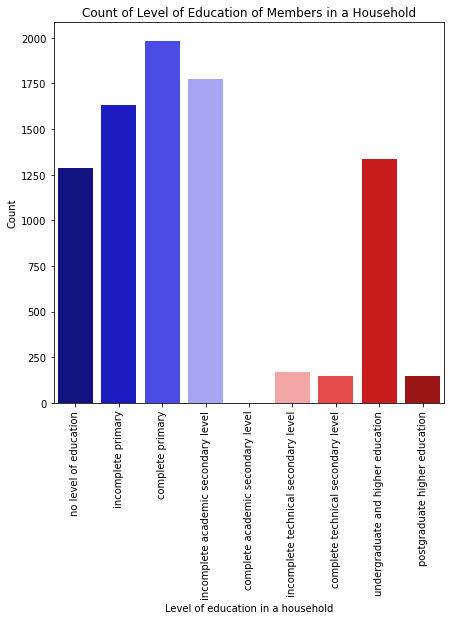

In [19]:
edu_level = [x for x in df.columns if x.startswith('instlevel')]
edu_index = ['no level of education', 'incomplete primary', 'complete primary', 'incomplete academic secondary level',
             'complete academic secondary level', 'incomplete technical secondary level', 
             'complete technical secondary level', 'undergraduate and higher education', 'postgraduate higher education']

edu_adlt = pd.DataFrame()
edu_adlt['index'] = edu_index
edu_adlt['value'] = df.loc[:,edu_level].sum().values

# bar plot
plt.figure(figsize=(7,7))
sns.barplot(edu_adlt['index'], edu_adlt['value'], palette = 'seismic')
plt.xlabel('Level of education in a household')
plt.ylabel('Count')
plt.title('Count of Level of Education of Members in a Household')
plt.xticks(rotation=90)

 * By looking at the above figure, we can conclude that 'complete primany' education is the highest level of education completed by the popluation, followed by 'Incomplete Academic Secondary Level' Education

In [20]:
# area1, =1 zona urbana
# area2, =2 zona rural

In [21]:
a1 = df.groupby('area1')['idhogar'].count()[1]
a2 = df.groupby('area2')['idhogar'].count()[1]
print('Count of Households in Urban zone: ', a1, '\n', 'Count of Households in Rural zone: ', a2)

Count of Households in Urban zone:  6829 
 Count of Households in Rural zone:  2728


In [22]:
area_count = pd.DataFrame({'Area': ['Urban', 'Rural'],
                           'Count': [a1, a2]})
area_count

,Area,Count
0,Urban,6829
1,Rural,2728


C:\Users\Bhaskaran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

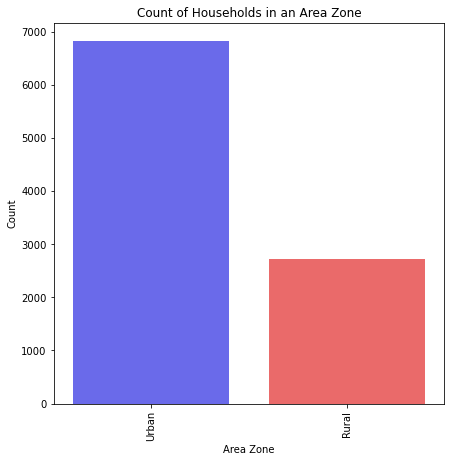

In [23]:
plt.figure(figsize=(7,7))
sns.barplot(area_count['Area'], area_count['Count'], palette = 'seismic', )
plt.xlabel('Area Zone')
plt.ylabel('Count')
plt.title('Count of Households in an Area Zone')
plt.xticks(rotation=90)

* By observing the aboce graph, we can say that the dataset consist more of Uraban population than Rural population by a large margin

# Check whether all members of the house have the same poverty level

In [24]:
# household without same poverty level
df_poverty = df.groupby('idhogar')['Target'].apply(lambda x: x.nunique() != 1)

diff_pov_level = df_poverty[df_poverty == True]

len(diff_pov_level)

85

* hence there are about 85 households with different proverty level between the family members

# Check if there is a house without a family head

In [25]:
# households with head of family
house_head = df.groupby('idhogar')['parentesco1'].sum()

# house without a head
len(house_head[house_head == 0])

15

* 15 households are without a House Head

In [26]:
df_no_house_head = df.loc[df['idhogar'].isin(house_head[house_head == 0].index), :]

# Set poverty level of the members and the head of the house within a family

In [27]:
# get the household labels without a head and different poverty level

df_diff_pov_no_head =  df_no_house_head.groupby('idhogar')['Target'].nunique()

In [28]:
df_diff_pov_no_head[df_diff_pov_no_head == 0]

Series([], Name: Target, dtype: int64)

* hence all the members of the household, with no house head, have same poverty level.

In [29]:
# let's get the index of the rows with different poverty levels

In [30]:
diff_pov_level.index

Index(['0172ab1d9', '03f4e5f4d', '0511912b6', '078a0b6e2', '09e25d616',
       '0f3e65c83', '0f9494d3a', '15a891635', '17fb04a62', '18832b840',
       '26b3a0f41', '288579c97', '28893b5e7', '2c9872b82', '2cb443214',
       '309fb7246', '30a70901d', '3c6973219', '3c73c107f', '3df651058',
       '3fe29a56b', '410194c8b', '417865404', '42ec8bef5', '43b9c83e5',
       '44f219a16', '46af47063', '4b6077882', '4c2dba109', '4dc11e11f',
       '4e19bd549', '50e064ee8', '513adb616', '54118d5d9', '55a662731',
       '564eab113', '594d3eb27', '5c3f7725d', '5c6f32bbc', '5e9329fc6',
       '614b48fb7', '636330516', '654ef7612', '67ad49822', '6833ac5dc',
       '694a0cbf4', '6a389f3de', '6bcf799cf', '6c543442a', '71cd52a80',
       '73d85d05d', '7ad269eef', '7c57f8237', '7e9d58c5c', '7ea6aca15',
       '80a66379b', '811a35744', '8242a51ec', '8420bcfca', '8ae3e74ca',
       '8bb6da3c1', '932287f5d', '9bbf7c6ca', 'a20ff33ba', 'a3288e6fa',
       'a94a45642', 'bcaa2e2f5', 'bcab69521', 'bd82509d1', 'be91

In [31]:
for i in diff_pov_level.index:
    
    # get the target value for different poverty level and house with a head
    target = int(df[(df['idhogar'] == i) & (df['parentesco1'] == 1.0)]['Target'])
    
    # updating the target value 
    df.loc[df['idhogar'] == i, 'Target'] = target

# Count how many null values are existing in columns.

In [32]:
df.isna().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64

In [33]:
df.isna().sum()[df.isna().sum()!=0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [34]:
df.isna().sum()[df.isna().sum()!=0].sum()

22140

In [35]:
# There are 22140 missing values in the train dataset

In [36]:
df_test.isna().sum()[df_test.isna().sum() > 0].sum()

55244

In [37]:
# There are 55244 missing values in the test dataset

# Remove null value rows of the target variable.

In [38]:
df[df['Target'].isna()]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target


* There are no null values in the target variable in the dataset

# Cleaning the datasets

In [39]:
df.dtypes[df.dtypes == 'object']

Id            object
idhogar       object
dependency    object
edjefe        object
edjefa        object
dtype: object

In [40]:
df_test.dtypes[df_test.dtypes == 'object']

Id            object
idhogar       object
dependency    object
edjefe        object
edjefa        object
dtype: object

In [41]:
df['dependency'].unique()

array(['no', '8', 'yes', '3', '0.5', '0.25', '2', '0.66666669',
       '0.33333334', '1.5', '0.40000001', '0.75', '1.25', '0.2', '2.5',
       '1.2', '4', '1.3333334', '2.25', '0.22222222', '5', '0.83333331',
       '0.80000001', '6', '3.5', '1.6666666', '0.2857143', '1.75',
       '0.71428573', '0.16666667', '0.60000002'], dtype=object)

In [42]:
df['edjefa'].unique(), df['edjefe'].unique() 

(array(['no', '11', '4', '10', '9', '15', '7', '14', '13', '8', '17', '6',
        '5', '3', '16', '19', 'yes', '21', '12', '2', '20', '18'],
       dtype=object),
 array(['10', '12', 'no', '11', '9', '15', '4', '6', '8', '17', '7', '16',
        '14', '5', '21', '2', '19', 'yes', '3', '18', '13', '20'],
       dtype=object))

In [43]:
# in the columns 'dependency', 'edjefe' and 'edjefa', there are 
# values 'yes' and 'no' which can be taken as '1' and '0'

# we will be replacing 'no' and 'yes' with 0 and 1 respectively

In [44]:
replace = {'yes': 1, 'no': 0}

df['dependency'] = df['dependency'].replace(replace).astype(float)
df['edjefa'] = df['edjefa'].replace(replace).astype(float)
df['edjefe'] = df['edjefe'].replace(replace).astype(float)

In [45]:
df.dtypes[df.dtypes == 'object']

Id         object
idhogar    object
dtype: object

In [46]:
# replacing the same in the test dataset

df_test['dependency'] = df_test['dependency'].replace(replace).astype(float)
df_test['edjefa'] = df_test['edjefa'].replace(replace).astype(float)
df_test['edjefe'] = df_test['edjefe'].replace(replace).astype(float)

In [47]:
df_test.dtypes[df_test.dtypes == 'object']

Id         object
idhogar    object
dtype: object

In [48]:
df.isna().sum()[df.isna().sum() > 0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

## Treating missing values in v2a1

* column v2a1 is related to columns:
 "tipovivi1","tipovivi2","tipovivi3","tipovivi4","tipovivi5"

In [49]:
# tipovivi1, =1 own and fully paid house
# tipovivi2, =1 own,  paying in installments
# tipovivi3, =1 rented
# tipovivi4, =1 precarious
# tipovivi5, =1 other(assigned,  borrowed)

### Let's visualize these columns with v2a1 being null

In [50]:
v2a1_null = df[df['v2a1'].isnull()]

v2a1_vis = v2a1_null[["tipovivi1","tipovivi2","tipovivi3","tipovivi4","tipovivi5"]].sum()
v2a1_vis

tipovivi1    5911
tipovivi2       0
tipovivi3       0
tipovivi4     163
tipovivi5     786
dtype: int64

<BarContainer object of 5 artists>

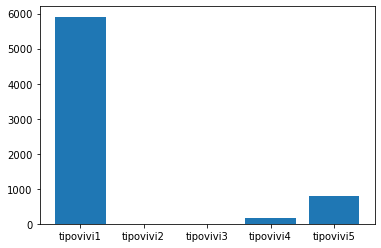

In [51]:
plt.bar(v2a1_vis.index, v2a1_vis.values)

* From the plot we can say that, the houses with v2a1 category as null are mostly owned and fully paid houses. Hence, they dont pay any rent
* Hence we can fill the null value with 0 for v2a1

In [52]:
df['v2a1'].fillna(0, inplace=True)

In [53]:
# doing the same for df_test

df_test['v2a1'].fillna(0, inplace=True)

In [54]:
df.isna().sum()[df.isna().sum() > 0]

v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [55]:
df_test.isna().sum()[df_test.isna().sum() > 0]

v18q1        18126
rez_esc      19653
meaneduc        31
SQBmeaned       31
dtype: int64

### Treating missing values for v18q1

In [56]:
df['v18q1'].isna().sum()

7342

### column v18q1 is related to v18q

- v18q, owns a tablet
- v18q1, number of tablets household owns

In [57]:
df[['v18q', 'v18q1']]

,v18q,v18q1
0,0,NaN
1,1,1.0
2,0,NaN
3,1,1.0
4,1,1.0
...,...,...
9552,0,NaN
9553,0,NaN
9554,0,NaN
9555,0,NaN


In [58]:
df['v18q'].value_counts()

0    7342
1    2215
Name: v18q, dtype: int64

In [59]:
df.groupby(by="v18q1")['v18q1'].count().sum()

2215

In [60]:
# as we can see that total value count for 'v18q' when 1 is 2215
# and the total count of 'v18q1' values is 2215

In [61]:
df[df['v18q'] == 0]['v18q1'].unique()

array([nan])

* hence we can conclude that when v18q = 0(owns tablets in household),  then the value v18q1 is null(count of tablet in the houseold)

* we can replace null with 0 in v18q1

In [62]:
df['v18q1'].fillna(0, inplace = True)

In [63]:
# doing the same for df_test

df_test['v18q1'].fillna(0, inplace = True)

In [64]:
df[df['v18q'] == 0]['v18q1'].count()

7342

In [65]:
df.isna().sum()[df.isna().sum() > 0]

rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

### Treating missing values for rez_esc

In [66]:
df['rez_esc']

0       NaN
1       NaN
2       NaN
3       1.0
4       NaN
       ... 
9552    NaN
9553    NaN
9554    NaN
9555    NaN
9556    NaN
Name: rez_esc, Length: 9557, dtype: float64

In [67]:
# checking features relation of rez_esc when value is not null

df[df['rez_esc'].notnull()]['age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [68]:
# it shows that when 'rez_esc' is not null, the age value ranges from 7 to 17

In [69]:
age_rez = list(df[df['rez_esc'].isna()]['age'].unique())

list_age = [x for x in age_rez if (x > 7 and x < 17) ]
list_age

[10]

* since there is only one null value in range of 7 years to 17 years
* we can fill the null values with 0

In [70]:
df['rez_esc'].fillna(0, inplace = True)

In [71]:
# doing the same for df_test

df_test['rez_esc'].fillna(0, inplace = True)

### Treating meaneduc missing values

#### meaneduc - average years of education in Adults

* related features can be:
* edjefe: years of education of male house head
* edjefa: years of education of female house head
* instlevel(from 1 to 9): level of education

In [72]:
df.loc[:,['meaneduc', 'edjefe', 'edjefa']]

,meaneduc,edjefe,edjefa
0,10.00,10.0,0.0
1,12.00,12.0,0.0
2,11.00,0.0,11.0
3,11.00,11.0,0.0
4,11.00,11.0,0.0
...,...,...,...
9552,8.25,9.0,0.0
9553,8.25,9.0,0.0
9554,8.25,9.0,0.0
9555,8.25,9.0,0.0


In [73]:
meaneduc_rows = df[df['meaneduc'].isna()]
meaneduc_rows[['meaneduc','edjefa', 'edjefe']]

,meaneduc,edjefa,edjefe
1291,NaN,10.0,0.0
1840,NaN,0.0,4.0
1841,NaN,0.0,4.0
2049,NaN,0.0,12.0
2050,NaN,0.0,12.0


* By observing the output of the above cells, we can say that meaneduc can be same as 'edjefe' or 'edjefa' depending upon the gender. 

* Hence we will fill the values in similar pattern

In [74]:
df['meaneduc'].fillna(df['edjefe'], inplace = True)

In [75]:
# doing the same for df_test

df_test['meaneduc'].fillna(df_test['edjefe'], inplace = True)

### Treating SQBmeaned missing values

In [76]:
df.isna().sum()[df.isna().sum()>0]

SQBmeaned    5
dtype: int64

In [77]:
# Column SQBmeaned is square of mean of years of education of adults (>=18) in a household

In [78]:
df[['SQBmeaned', 'meaneduc']]

,SQBmeaned,meaneduc
0,100.0000,10.00
1,144.0000,12.00
2,121.0000,11.00
3,121.0000,11.00
4,121.0000,11.00
...,...,...
9552,68.0625,8.25
9553,68.0625,8.25
9554,68.0625,8.25
9555,68.0625,8.25


In [79]:
df[df['SQBmeaned'].isna()]['meaneduc']

1291     0.0
1840     4.0
1841     4.0
2049    12.0
2050    12.0
Name: meaneduc, dtype: float64

* By observing the above output, we can say that SQBmeaned is square of meanduc column
* Hence we can fill in the values in similar pattern

In [80]:
df['SQBmeaned'].fillna(value = df['meaneduc']**2, inplace = True)

In [81]:
# doing the same for df_test
df_test['SQBmeaned'].fillna(value = df_test['meaneduc']**2, inplace = True)

In [82]:
df.isna().sum()[df.isna().sum() != 0]

Series([], dtype: int64)

In [83]:
df_test.isna().sum()[df_test.isna().sum() != 0]

Series([], dtype: int64)

## Now the datasets are cleaned

## Removing redundant data

In [84]:
# removing the squared columns:

sqr_list = [x for x in df.columns if x.startswith('SQB')]
df.drop(sqr_list, axis = 1, inplace = True)
df_test.drop(sqr_list, axis = 1, inplace = True)

In [85]:
df.shape

(9557, 135)

In [86]:
df.drop('agesq', axis = 1, inplace = True)
df_test.drop('agesq', axis = 1, inplace = True)

In [87]:
# function to get a list of column names with a specific value of collinearity or above

def correlation(dataset, threshold):
    corr_name = set()
    corr_matrix = dataset.corr()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

    for i in range(len(upper.columns)):
        for j in range(i):
            if abs(upper.iloc[j,i]) > threshold:
                col_name = upper.columns[i]
                corr_name.add(col_name)

    return corr_name

In [88]:
# removing columns having high correlation inorder to avoid multi collinearity

In [89]:
df_new = df.loc[df['parentesco1'] == 1, :]
df_new.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,1,0,0,0,0,0,1,0,43,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,1,0,0,0,0,0,1,0,67,4
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,1,0,0,0,0,0,1,0,92,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,1,0,0,0,0,0,1,0,38,4
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,0.0,0,...,1,0,0,0,0,0,1,0,30,4


In [90]:
df_new.corr()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
v2a1,1.000000,-0.022945,0.096752,-0.021961,0.024083,0.045291,0.179476,0.202622,0.025942,-0.029886,...,0.168408,-0.039600,-0.023930,-0.077042,-0.090304,-0.067789,0.141330,-0.141330,-0.205431,0.166112
hacdor,-0.022945,1.000000,-0.181283,0.624324,-0.143713,-0.055073,-0.061309,-0.056616,0.186709,0.057368,...,-0.029605,0.010581,0.026791,-0.010283,0.025574,0.001103,0.025404,-0.025404,-0.090660,-0.136275
rooms,0.096752,-0.181283,1.000000,-0.172382,0.136410,0.158394,0.263738,0.271945,-0.039824,0.232702,...,0.210526,-0.069091,-0.132380,-0.028103,-0.097762,-0.055276,0.126715,-0.126715,0.189562,0.201019
hacapo,-0.021961,0.624324,-0.172382,1.000000,-0.154749,-0.062110,-0.051432,-0.045953,0.174432,0.088729,...,-0.032999,0.018682,0.007766,0.000237,0.007112,0.025496,0.015219,-0.015219,-0.053421,-0.096313
v14a,0.024083,-0.143713,0.136410,-0.154749,1.000000,0.192954,0.029549,0.027883,-0.036434,0.019440,...,0.018571,-0.007181,-0.015806,0.006585,-0.021979,0.005262,-0.018117,0.018117,0.031887,0.068230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lugar6,-0.067789,0.001103,-0.055276,0.025496,0.005262,-0.053853,-0.081023,-0.080580,0.037855,0.030872,...,-0.348073,-0.091332,-0.076929,-0.086971,-0.092448,1.000000,-0.247387,0.247387,-0.036605,-0.047958
area1,0.141330,0.025404,0.126715,0.015219,-0.018117,0.066396,0.167636,0.157366,-0.034287,-0.043043,...,0.375230,-0.102796,-0.009893,-0.184287,-0.123131,-0.247387,1.000000,-1.000000,0.046851,0.089509
area2,-0.141330,-0.025404,-0.126715,-0.015219,0.018117,-0.066396,-0.167636,-0.157366,0.034287,0.043043,...,-0.375230,0.102796,0.009893,0.184287,0.123131,0.247387,-1.000000,1.000000,-0.046851,-0.089509
age,-0.205431,-0.090660,0.189562,-0.053421,0.031887,0.038315,-0.082681,-0.076773,-0.292030,0.048152,...,0.088904,0.004921,-0.046924,-0.025493,-0.057551,-0.036605,0.046851,-0.046851,1.000000,0.026581


In [91]:
rem_list = list(correlation(df_new, 0.95))
rem_list

['female', 'area2', 'tamhog', 'coopele', 'hogar_total', 'hhsize']

In [92]:
# Dropping columns from train and test data

In [93]:
df.drop(rem_list, axis = 1, inplace = True)
df_test.drop(rem_list, axis = 1, inplace = True)

In [94]:
# dropping columns id and idhogar

df.drop(['Id', 'idhogar'], axis = 1, inplace = True)
df_test.drop(['Id', 'idhogar'], axis = 1, inplace = True)

In [95]:
# Spliting dataframe into test and train data

In [96]:
x = df.drop('Target', axis = 1)
y = df.Target

x_tr, x_test, y_tr, y_test = train_test_split(x,y, test_size=0.2)

# Prediction and Cross Validation

## Predicting using random forest classifier

In [97]:
rand_model = RandomForestClassifier(n_estimators=100)
rand_model.fit(x_tr, y_tr)

RandomForestClassifier()

In [98]:
pred1 = rand_model.predict(x_test)
accuracy_score(y_test, pred1)

0.9393305439330544

In [99]:
confusion_matrix(y_test, pred1)

array([[ 136,    4,    0,   23],
       [   4,  283,    1,   41],
       [   1,    1,  212,   39],
       [   0,    1,    1, 1165]], dtype=int64)

## Predicting using linear regression

In [100]:
lr_model = LinearRegression().fit(x_tr, y_tr)
pred2 = lr_model.predict(x_test)

In [101]:
r2_score(y_test, pred2)

0.340113827688555

## Predicting using Decision Tree

In [102]:
dtree = DecisionTreeClassifier().fit(x_tr, y_tr)
pred3 = dtree.predict(x_test)

In [103]:
accuracy_score(y_test, pred3)

0.9456066945606695

## Predicting using Gradient Boosting Classifier

In [104]:
gb_model = GradientBoostingClassifier().fit(x_tr, y_tr)
pred4 = gb_model.predict(x_test)

In [105]:
accuracy_score(y_test, pred4)

0.7390167364016736

## Predicting using K Nearest Neighbours

In [106]:
params = {'n_neighbors': range(1,50)}
gs_model = GridSearchCV(KNeighborsClassifier(), params)
gs_model.fit(x_tr, y_tr)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)})

In [107]:
gs_model.best_params_

{'n_neighbors': 1}

In [108]:
pred5 = gs_model.predict(x_test)
accuracy_score(y_test, pred5)

0.7018828451882845

In [109]:
kmod = KNeighborsClassifier(n_neighbors=1).fit(x_tr, y_tr)

In [110]:
pred5_1 = kmod.predict(x_test)
np.sqrt(mean_squared_error(y_test, pred5_1))

0.9809908746947188

In [111]:
r2_score(y_test, pred5_1)

0.0849847275511646

In [112]:
accuracy_score(y_test, pred5_1)

0.7018828451882845

In [113]:
error = []

for i in range(1, 50):
    kmod = KNeighborsRegressor(n_neighbors = i).fit(x_tr, y_tr)
    p = kmod.predict(x_test)
    m = np.sqrt(mean_squared_error(y_test, p))
    error.append(m)
    
error

[0.9809908746947188,
 0.8951286109412004,
 0.8735418214416133,
 0.8679482732403588,
 0.8650464954732456,
 0.8682536965866878,
 0.8731446166851832,
 0.8756815188097423,
 0.8766076860132113,
 0.8785716108057485,
 0.8768286331335475,
 0.8797007126253703,
 0.8782745276527134,
 0.8771922292091318,
 0.8783278352335071,
 0.8770115196932627,
 0.8760036963409192,
 0.8753924020312055,
 0.8761368706608504,
 0.8760521170087321,
 0.8755400424553699,
 0.874598849422829,
 0.8746915476018666,
 0.8751468255307986,
 0.8749498491306367,
 0.8764994473620709,
 0.875636495029195,
 0.876265826890821,
 0.8748077693280863,
 0.8751990541998651,
 0.8749182438840076,
 0.875468309469394,
 0.8759729293251838,
 0.8778924708961784,
 0.8796091869397359,
 0.8808081162499232,
 0.8801830381360048,
 0.8804625762740569,
 0.8795165258781678,
 0.8794797161559255,
 0.8787336385837706,
 0.8785548383405413,
 0.8797947357417044,
 0.878510787374867,
 0.8787355966234556,
 0.8784619407095346,
 0.879485824164391,
 0.8790343182108414

<Figure size 1800x1800 with 0 Axes>

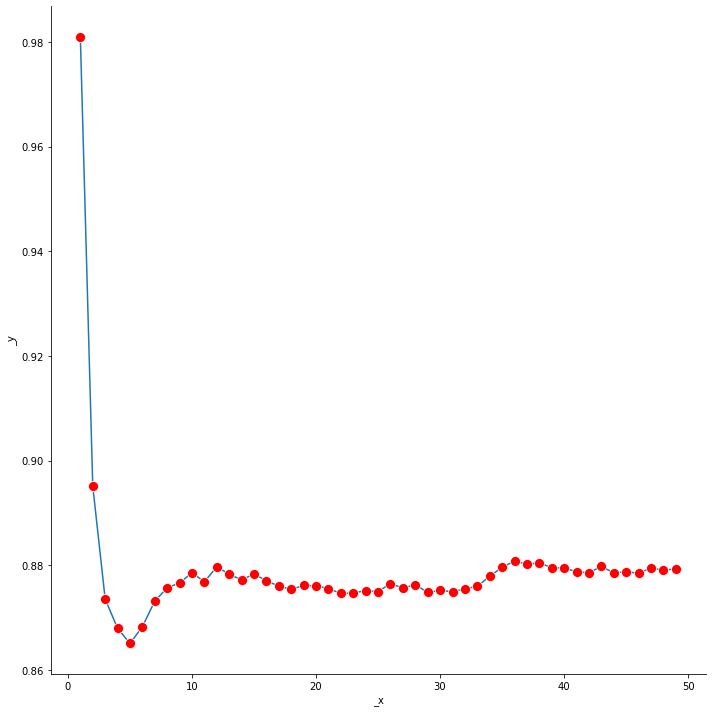

In [114]:
plt.figure(figsize=(25, 25))
sns.relplot(x = range(1,50), y = error, kind = "line",
            marker="o",markerfacecolor="red",markersize=10, 
            height = 10, aspect= 10/10)

In [115]:
# the bend is at 5

In [116]:
kmod_fin = KNeighborsClassifier(n_neighbors=5).fit(x_tr, y_tr)
p_knn_fin = kmod_fin.predict(x_test)
r2_score(y_test, p_knn_fin)

-0.04878652695358365

In [117]:
accuracy_score(y_test, p_knn_fin)

0.6417364016736402

## Predicting using Naive Bayes

In [118]:
model = GaussianNB()
model.fit(x_tr, y_tr)
pred6 = model.predict(x_test)
accuracy_score(y_test, pred6)

0.602510460251046

## Predicting using XGBoost

In [119]:
gb = xgb.XGBClassifier()
gb.fit(x_tr, y_tr)
pred7 = gb.predict(x_test)

C:\Users\Bhaskaran\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [120]:
f1_score(y_test, pred7, average='macro')

0.9166261940672786

* Random Forest Classifier gave an accuracy score of: 0.9377
* Linear Regression gave an accuracy score of: 0.3481
* Decision Tree Classifier gave an accuracy score of: 0.9361
* Gradient Boosting Classifier gave an accuracy score of: 0.7594
* K Nearest Neighbour gave an accuracy score of: 0.6558
* Naive Bayes gave an accuracy score of: 0.6004
* XGBoost gave an accuracy score of: 0.9053



### Hence Random Forest is giving us better accuracy

## Cross Validating using K Fold

In [121]:
# Linear Regession Model

kmod = KFold(n_splits=10, shuffle=True)
logit_mod2 = LinearRegression()
accuracy = cross_val_score(logit_mod2, x,y, cv=kmod)
accuracy

array([0.36239146, 0.35314106, 0.34799596, 0.37639844, 0.35004397,
       0.35157781, 0.37378017, 0.31401351, 0.36249973, 0.31146993])

In [122]:
accuracy.mean()

0.35033120362118675

In [123]:
# Decision Tree Model

kmod = KFold(n_splits=10, shuffle=True)
dtree2 = DecisionTreeRegressor()
accuracy = cross_val_score(dtree2, x,y, cv=kmod)
accuracy

array([0.90189315, 0.8910375 , 0.86674337, 0.86482119, 0.87717843,
       0.89126838, 0.84961509, 0.88924338, 0.89432842, 0.87187531])

In [124]:
accuracy.mean()

0.8798004207796449

In [125]:
# Random Forest Model

kmod = KFold(n_splits=10, shuffle=True)
dtree2 = RandomForestClassifier()
accuracy = cross_val_score(dtree2, x,y, cv=kmod)
accuracy

array([0.95606695, 0.95711297, 0.958159  , 0.9623431 , 0.9623431 ,
       0.95606695, 0.95292887, 0.9591623 , 0.9486911 , 0.95811518])

In [126]:
accuracy.mean()

0.9570989506889527

# Prediction test data using Random Forest

In [127]:
X = df.drop('Target', axis = 1)
Y = df.Target

In [128]:
rand_model2 = RandomForestClassifier(n_estimators=100)
rand_model2.fit(X, Y)

RandomForestClassifier()

In [129]:
predict = rand_model2.predict(df_test)

In [130]:
predict

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)